My approach to this analysis was my own, inspired by the guidance provided to us by Professor Bockman. The code in my csv tools and this Jupyter notebook was written in collaboration with Claude AI. Using this tool enabled me to try many different analytical approaches and different methods to perpare the data. Most failed to provide useful or intriguing results. The analyses seen below are some of the views that proved most interesting, though ultimately my clustering is still not accurate enough to be useful in a commercial sense. At the end of this notebook is the clustering of unique Terminal Units (TUs) assigned to one Rooftop Unit (RTU) or the other. That dataset is merged by timestamps shared between the TU and RTU datasets. Many features were removed as they were either not able to be matched between RTU and TU, or they provided no significant impact on results. -Cody

Explained variance ratio: [0.33747671 0.2839203 ]
Cumulative explained variance: 0.6213970092923068


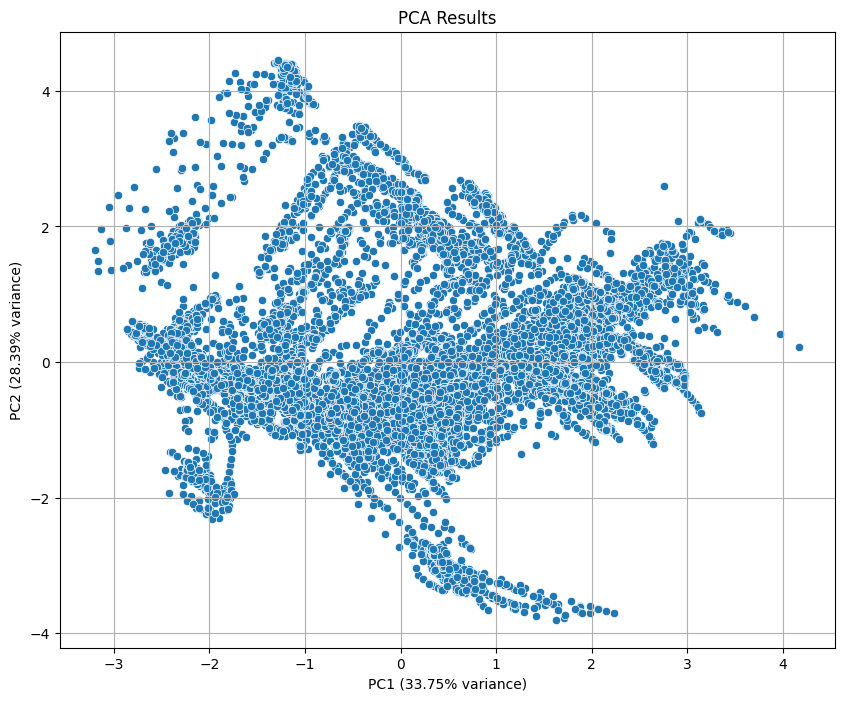

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv('/content/Combined_TU.csv')

# Step 2: Prepare the data
# Select only numerical columns for PCA
numeric_data = df.select_dtypes(include=[np.number])
# Handle missing values (if any)
numeric_data = numeric_data.dropna()

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
# Create a PCA instance (with number of components as parameter)
pca = PCA(n_components=2)  # Change this based on your needs
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']  # Adjust column names based on n_components
)

# Step 5: Analyze the results
# Check the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.sum(pca.explained_variance_ratio_))

# Visualize the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()

# Optional: Add original target/class labels to the visualization if available
# if 'target' column exists in your original dataframe:
# pca_df['target'] = df['target'].values
# sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)

Explained variance ratio: [0.45100482 0.24445302]
Cumulative explained variance: 0.6954578337447668


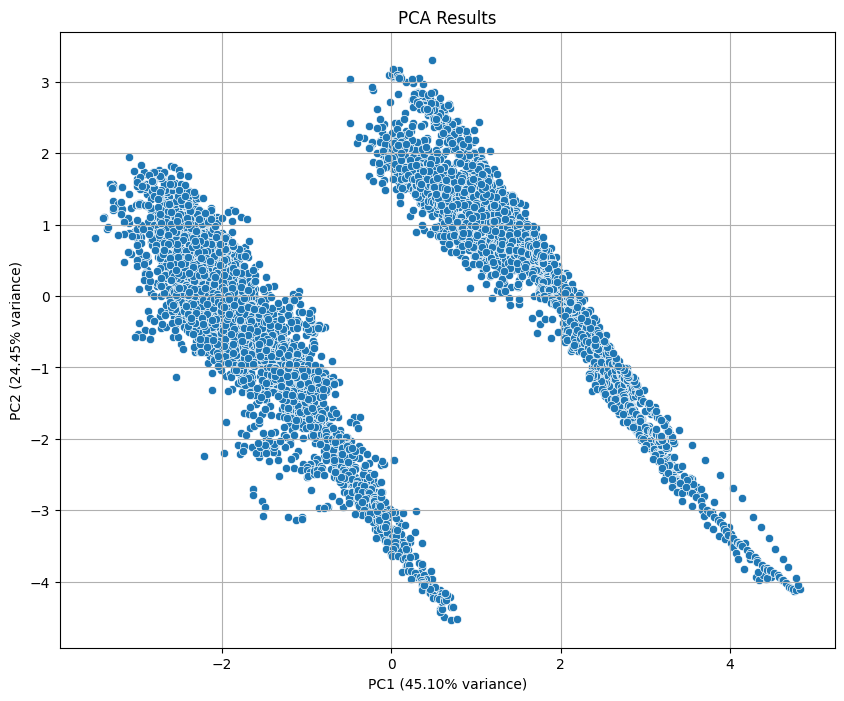

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv('/content/Combined_RTU.csv')

# Step 2: Prepare the data
# Select only numerical columns for PCA
numeric_data = df.select_dtypes(include=[np.number])
# Handle missing values (if any)
numeric_data = numeric_data.dropna()

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
# Create a PCA instance (with number of components as parameter)
pca = PCA(n_components=2)  # Change this based on your needs
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']  # Adjust column names based on n_components
)

# Step 5: Analyze the results
# Check the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.sum(pca.explained_variance_ratio_))

# Visualize the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()

# Optional: Add original target/class labels to the visualization if available
# if 'target' column exists in your original dataframe:
# pca_df['target'] = df['target'].values
# sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)

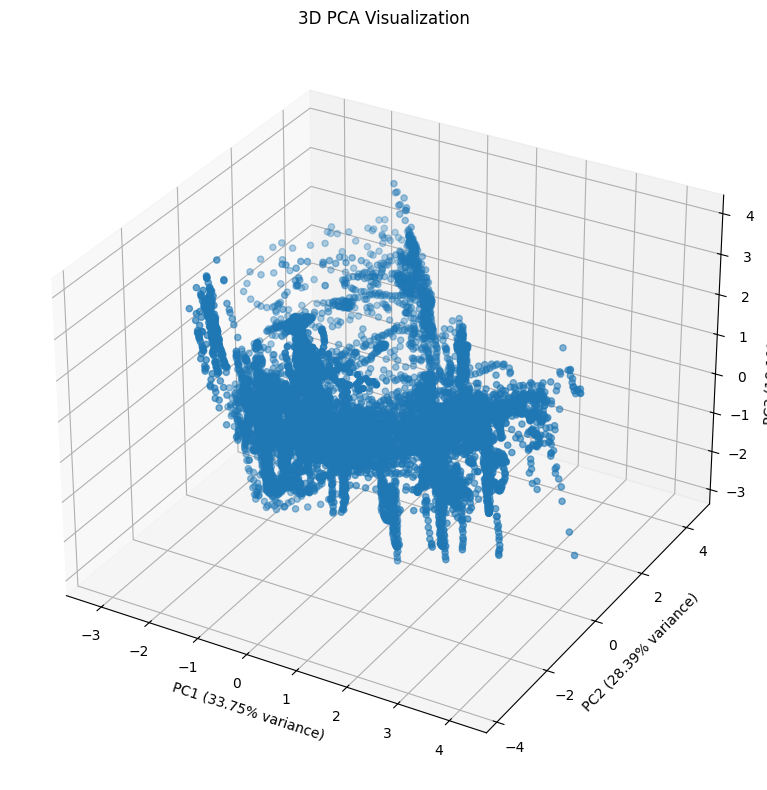

Explained variance ratio by component:
PC1: 0.3375 (33.75%)
PC2: 0.2839 (28.39%)
PC3: 0.1819 (18.19%)
Total variance explained: 80.33%


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Steps 1-3 remain the same as before
# Load the data
df = pd.read_csv('/content/Combined_TU.csv')

# Prepare the data
numeric_data = df.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA with 3 components
pca = PCA(n_components=3)  # Changed to 3 components
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2', 'PC3']  # Now we have 3 columns
)

# Step 5: Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot the 3D scatter plot
ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3']
)

# Label the axes
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')

plt.title('3D PCA Visualization')
plt.tight_layout()
plt.show()

# Print the explained variance
print("Explained variance ratio by component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio:.2%})")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

Explained variance ratio: [0.45812585 0.33355512]
Cumulative explained variance: 0.7916809657094526


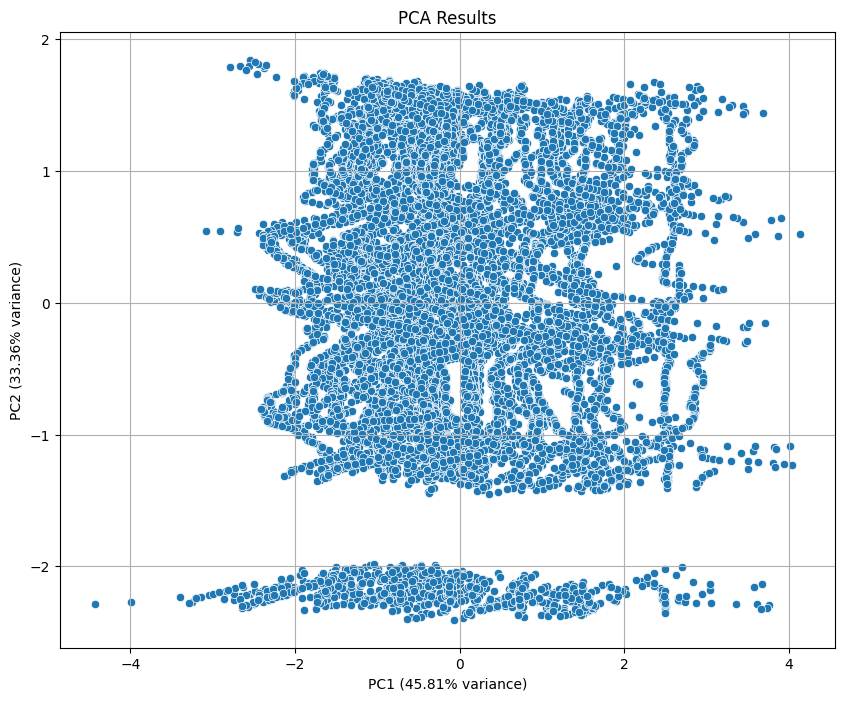

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv('/content/Simplified_TU.csv')

# Step 2: Prepare the data
# Select only numerical columns for PCA
numeric_data = df.select_dtypes(include=[np.number])
# Handle missing values (if any)
numeric_data = numeric_data.dropna()

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
# Create a PCA instance (with number of components as parameter)
pca = PCA(n_components=2)  # Change this based on your needs
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']  # Adjust column names based on n_components
)

# Step 5: Analyze the results
# Check the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.sum(pca.explained_variance_ratio_))

# Visualize the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()

# Optional: Add original target/class labels to the visualization if available
# if 'target' column exists in your original dataframe:
# pca_df['target'] = df['target'].values
# sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)

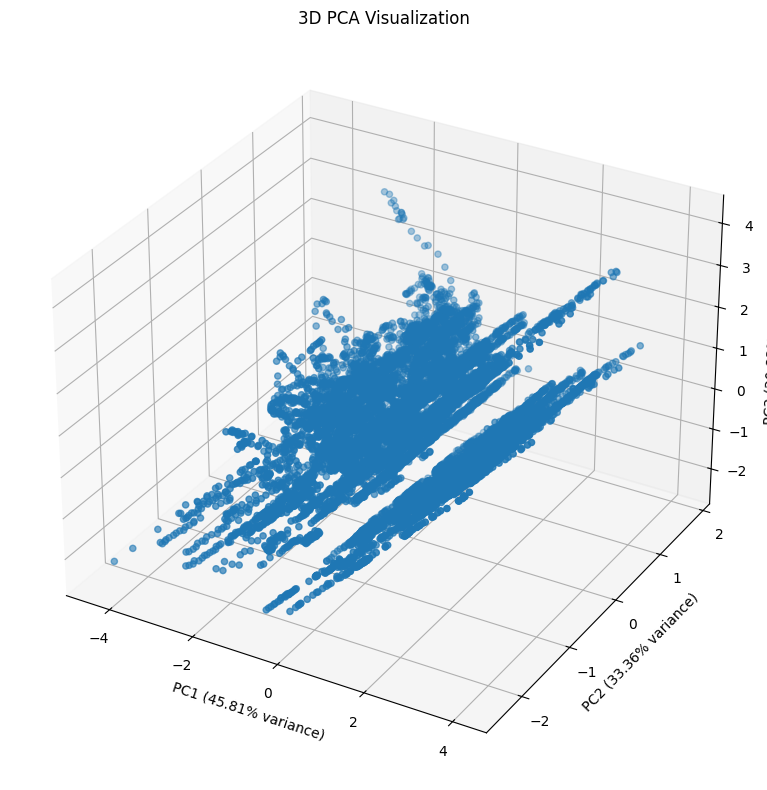

Explained variance ratio by component:
PC1: 0.4581 (45.81%)
PC2: 0.3336 (33.36%)
PC3: 0.2083 (20.83%)
Total variance explained: 100.00%


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Steps 1-3 remain the same as before
# Load the data
df = pd.read_csv('/content/Simplified_TU.csv')

# Prepare the data
numeric_data = df.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA with 3 components
pca = PCA(n_components=3)  # Changed to 3 components
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2', 'PC3']  # Now we have 3 columns
)

# Step 5: Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot the 3D scatter plot
ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3']
)

# Label the axes
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')

plt.title('3D PCA Visualization')
plt.tight_layout()
plt.show()

# Print the explained variance
print("Explained variance ratio by component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio:.2%})")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

        PC1       PC2       PC3  Cluster
0 -0.051113  0.662728 -0.258233        0
1 -0.022962  0.004571 -0.272535        0
2 -0.510940 -0.041212 -0.711474        0
3 -1.380186 -0.808229 -1.523601        0
4 -0.642163 -0.392433 -0.774225        0


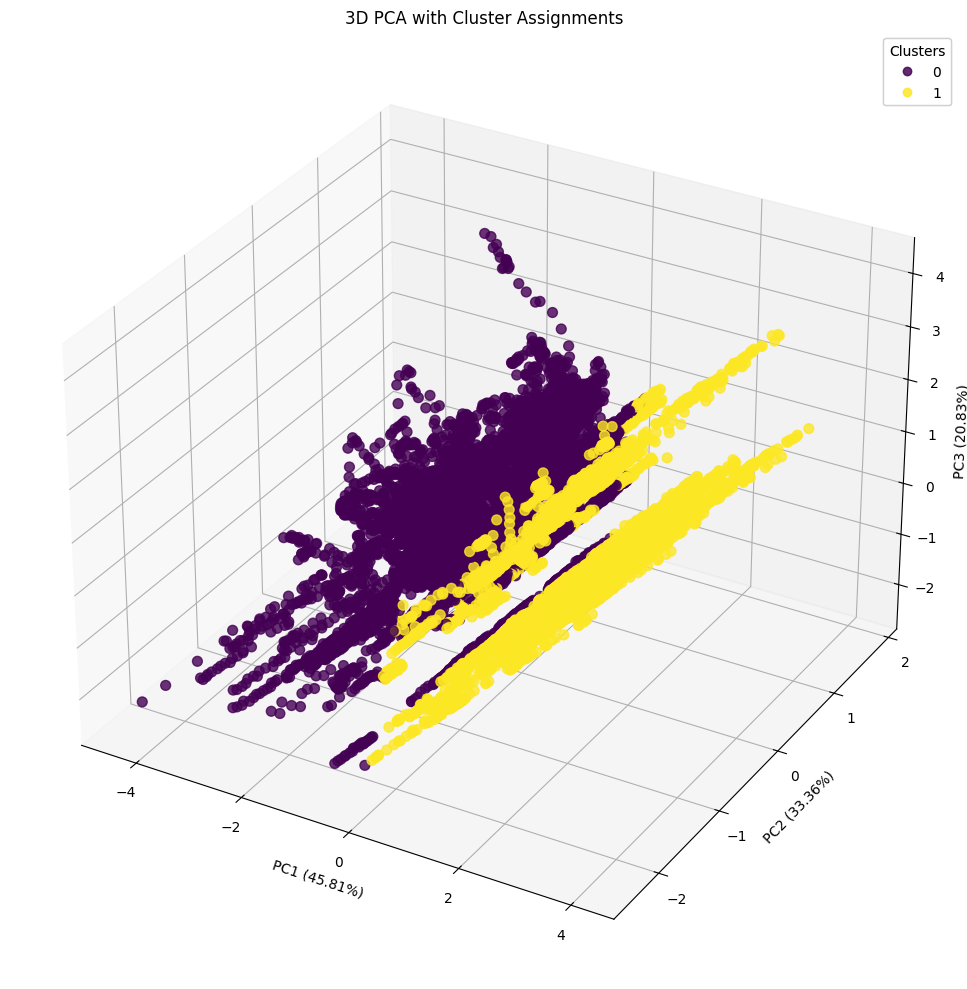

In [7]:
from sklearn.cluster import KMeans

# Apply K-means with 2 clusters (since you observed 2 distinct clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

# Add cluster labels to your PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Print the first few rows to see cluster assignments
print(pca_df.head())

# Visualize clusters in 3D with colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points with cluster colors
scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['Cluster'],  # Color by cluster
    cmap='viridis',       # Color scheme
    s=50,                 # Point size
    alpha=0.8            # Transparency
)

# Add cluster legend
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Clusters")
ax.add_artist(legend1)

# Label axes
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')

plt.title('3D PCA with Cluster Assignments')
plt.tight_layout()
plt.show()

Column RTU_source unique values: [1 2]
Column TU_source unique values sample: ['A' 'AA' 'B' 'BB' 'C']
Number of unique RTUs: 2
Number of unique TUs: 47
Number of unique RTU-TU combinations: 94
Original DataFrame: 30080 rows
Filtered DataFrame: 15040 rows
Removed 15040 rows


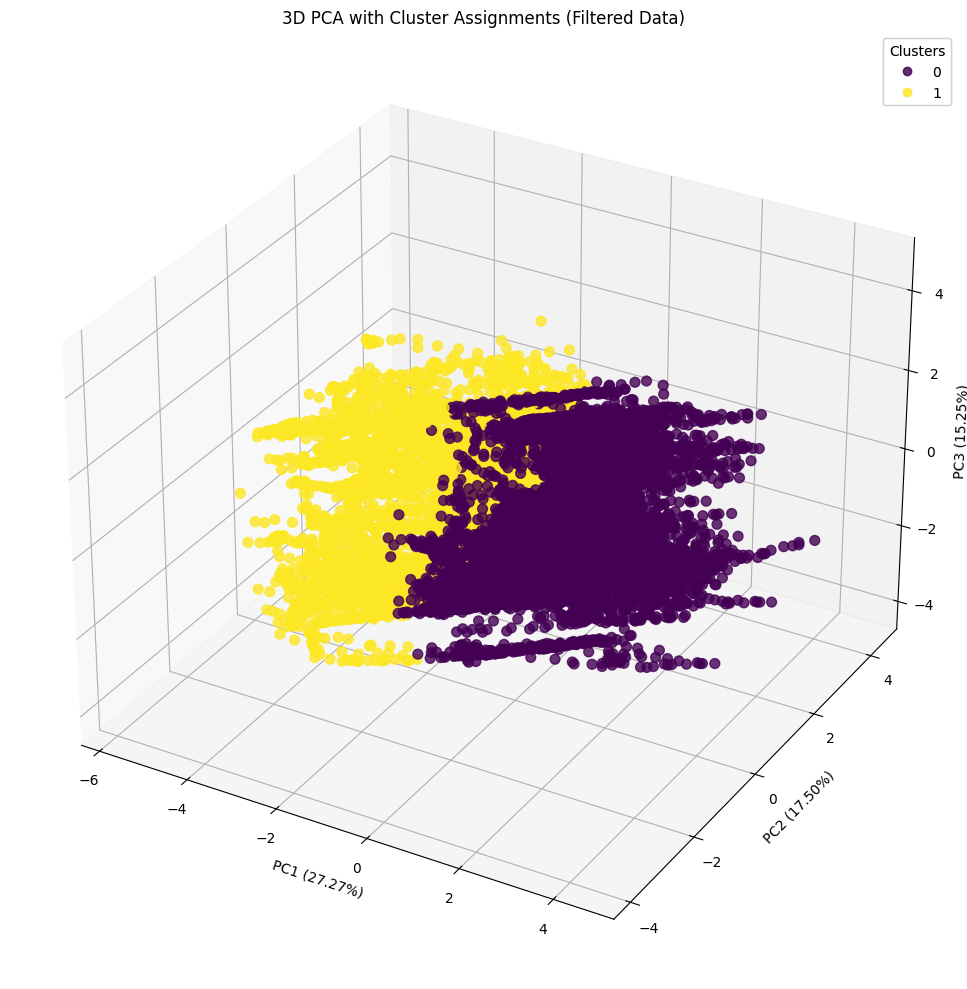

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Merged_RTU_TU.csv')

# First, let's examine the data structure more carefully
print("Column RTU_source unique values:", df['RTU_source'].unique())
print("Column TU_source unique values sample:", df['TU_source'].unique()[:5])  # Show first 5

# Modified approach: In this dataset, each row appears to have both RTU and TU data
# Instead of trying to separate them, let's identify unique RTU-TU combinations

# Get unique RTU IDs
rtu_ids = df['RTU_source'].unique()
rtu_ids = [x for x in rtu_ids if not pd.isna(x)]

# Get unique TU IDs
tu_ids = df['TU_source'].unique()
tu_ids = [x for x in tu_ids if not pd.isna(x) and x != '']

print(f"Number of unique RTUs: {len(rtu_ids)}")
print(f"Number of unique TUs: {len(tu_ids)}")

# Let's see how many combinations we have
rtu_tu_combos = df[['RTU_source', 'TU_source']].drop_duplicates()
print(f"Number of unique RTU-TU combinations: {len(rtu_tu_combos)}")

# For each TU, we'll perform clustering to determine which RTU it's more associated with
# First, prepare data for PCA - focus on common measurements between RTUs and TUs
features = ['RTU_RmTemp', 'TU_RmTemp', 'RTU_SuplAirTemp', 'TU_DschAirTemp', 'RTU_OutAirFlow', 'TU_AirFlow']
pca_ready = df[features].dropna()

# If we have rows with complete data
if len(pca_ready) > 0:
    # Perform PCA
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pca_ready)

    pca = PCA(n_components=2)  # Using 2 components for simplicity
    principal_components = pca.fit_transform(scaled_data)

    # Create PCA DataFrame
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=['PC1', 'PC2']
    )

    # Add RTU and TU source information
    pca_df['RTU_source'] = df.loc[pca_ready.index, 'RTU_source'].values
    pca_df['TU_source'] = df.loc[pca_ready.index, 'TU_source'].values

    # Apply clustering
    kmeans = KMeans(n_clusters=len(rtu_ids), random_state=42)
    pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

    # For each TU, determine which cluster (RTU) it belongs to most frequently
    tu_cluster_counts = {}

    for tu_id in tu_ids:
        # Get all entries for this TU
        tu_entries = pca_df[pca_df['TU_source'] == tu_id]

        if len(tu_entries) > 0:
            # Count occurrences in each cluster
            cluster_counts = tu_entries['Cluster'].value_counts()
            # Assign TU to the most common cluster
            most_common_cluster = cluster_counts.idxmax()
            tu_cluster_counts[tu_id] = most_common_cluster

    # Now create a filtered dataset keeping only the rows where TU is paired with its most likely RTU
    filtered_indices = []

    for idx, row in df.iterrows():
        tu_id = row['TU_source']
        rtu_cluster = None

        # If this is a valid TU with an assigned cluster
        if tu_id in tu_cluster_counts:
            tu_cluster = tu_cluster_counts[tu_id]

            # Get the RTU for this row
            rtu_id = row['RTU_source']

            # Check if this RTU's rows typically fall in the same cluster as this TU
            rtu_entries = pca_df[pca_df['RTU_source'] == rtu_id]
            if len(rtu_entries) > 0:
                rtu_cluster = rtu_entries['Cluster'].value_counts().idxmax()

            # Keep this row if the TU's cluster matches the RTU's cluster
            if tu_cluster == rtu_cluster:
                filtered_indices.append(idx)

    # Create filtered dataframe
    df_filtered = df.loc[filtered_indices]

    print(f"Original DataFrame: {len(df)} rows")
    print(f"Filtered DataFrame: {len(df_filtered)} rows")
    print(f"Removed {len(df) - len(df_filtered)} rows")

    # Perform final PCA and clustering on filtered data
    features_for_final = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
    final_data = df_filtered[features_for_final].dropna()

    scaler = StandardScaler()
    scaled_final = scaler.fit_transform(final_data)

    pca_final = PCA(n_components=3)
    final_components = pca_final.fit_transform(scaled_final)

    # Create final PCA DataFrame
    final_pca_df = pd.DataFrame(
        data=final_components,
        columns=['PC1', 'PC2', 'PC3']
    )

    # Apply K-means with 2 clusters (assuming we want to cluster by RTU)
    final_kmeans = KMeans(n_clusters=2, random_state=42)
    final_pca_df['Cluster'] = final_kmeans.fit_predict(final_components)

    # Visualize final clusters
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        final_pca_df['PC1'],
        final_pca_df['PC2'],
        final_pca_df['PC3'],
        c=final_pca_df['Cluster'],
        cmap='viridis',
        s=50,
        alpha=0.8
    )

    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    ax.set_xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]:.2%})')
    ax.set_ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]:.2%})')
    ax.set_zlabel(f'PC3 ({pca_final.explained_variance_ratio_[2]:.2%})')

    plt.title('3D PCA with Cluster Assignments (Filtered Data)')
    plt.tight_layout()
    plt.show()
else:
    print("No complete data rows found with the selected features!")
    # Print the counts of non-null values for each column
    print(df[features].count())

In [33]:
# At the end of the clustering section, add this code to output the associations

# Create a dictionary to store the final TU to RTU mapping
tu_to_rtu_mapping = {}

# For each TU, determine its assigned RTU
for tu_id in tu_ids:
    # Get filtered data for this TU
    tu_filtered = df_filtered[df_filtered['TU_source'] == tu_id]

    if len(tu_filtered) > 0:
        # Get the most common RTU associated with this TU in our filtered dataset
        associated_rtu = tu_filtered['RTU_source'].value_counts().idxmax()
        tu_to_rtu_mapping[tu_id] = associated_rtu

# Print the mapping in a clear format
print("\n=== TU to RTU Associations ===")
print("TU Source ID | Associated RTU")
print("-" * 30)

for tu_id, rtu_id in sorted(tu_to_rtu_mapping.items()):
    print(f"{tu_id:<12} | {rtu_id}")

print("-" * 30)
print(f"Total TUs mapped: {len(tu_to_rtu_mapping)} out of {len(tu_ids)}")

# Optional: Save the mapping to a CSV file
mapping_df = pd.DataFrame(list(tu_to_rtu_mapping.items()),
                         columns=['TU_Source', 'Associated_RTU'])
mapping_df.to_csv('tu_rtu_associations.csv', index=False)
print("Mapping saved to 'tu_rtu_associations.csv'")


=== TU to RTU Associations ===
TU Source ID | Associated RTU
------------------------------
A            | 2
AA           | 2
B            | 2
BB           | 2
C            | 2
CC           | 2
D            | 2
DD           | 2
E            | 2
EE           | 2
F            | 2
FF           | 2
G            | 2
GG           | 2
H            | 2
HH           | 2
I            | 2
II           | 2
J            | 2
JJ           | 2
K            | 2
KK           | 2
L            | 2
LL           | 2
M            | 2
MM           | 2
N            | 2
NN           | 2
O            | 2
OO           | 2
P            | 2
PP           | 2
Q            | 2
QQ           | 2
R            | 2
RR           | 2
S            | 2
SS           | 2
T            | 2
TT           | 2
U            | 2
UU           | 2
V            | 2
W            | 2
X            | 2
Y            | 2
Z            | 2
------------------------------
Total TUs mapped: 47 out of 47
Mapping saved to 'tu_rtu_associations.csv'
